In [1]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [2]:
dataset = MNIST(root='data/',download=True,transform=ToTensor())

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
img,label = dataset[0]
img.shape,label

(torch.Size([1, 28, 28]), 5)

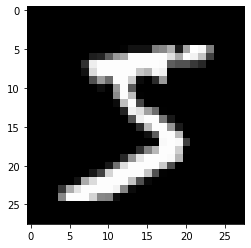

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0],cmap='gray')


In [7]:
img[0,10:15,10:15]

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])

In [8]:
def split_indices(n,val_pct):
    # determine size of validation set
    n_val = int (val_pct*n)
    # creating random permutation of 0 to n-1
    indxs = np.random.permutation(n)
    # pick first n_val indices for validation set
    return indxs[n_val:],indxs[:n_val]
    

In [9]:
train_indices , val_indices = split_indices(len(dataset),val_pct=.166667)
print(len(train_indices) , len(val_indices))
print('Sample validation indices:',val_indices[:20])

50000 10000
Sample validation indices: [57432 18673 44603 38529 40800 10844 37925 41808 39550 42039  3325  3175
  3320 26856 31656 19281 40059   919 48293 28309]


In [10]:
train_indices , val_indices = split_indices(len(dataset),val_pct=.2)
print(len(train_indices) , len(val_indices))
print('Sample validation indices:',val_indices[:20])

48000 12000
Sample validation indices: [13910 23476 29911  6339 50033 41272  5790 14529 47788  9962 42732  2955
 30967 52587 14742  5515 52620 55139 58830 16409]


In [11]:
batch_size = 100

# traning sampler data Loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,batch_size,sampler=train_sampler)

# validation sampler and data loader
valid_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset,batch_size,sampler=valid_sampler)

In [12]:
# MODEL

import torch.nn.functional as F
import torch.nn as nn

In [13]:
class MnistModel(nn.Module):
    """Feedforward neural network with 1 hidden layer"""
    def __init__(self,in_size,hidden_size,out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size,hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size,out_size)
        
    def forward(self,xb):
        # flatten the image tensor
        xb = xb.view(xb.size(0),-1)
        # get intermediate output using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # get predictions using output layer
        out = self.linear2(out)
        return out

In [14]:
# we need [100,784] matrix
for xb , yb in train_dl:
    print(xb.shape)
    break

torch.Size([100, 1, 28, 28])


In [15]:
# above solution
for xb,yb in train_dl:
    
#     xb = xb.view(100,784) 
# but every time our batch size would not be same and also 28 X 28 image also become any size in other model 
# for generalized model we will do "below"
    xb = xb.view(xb.size(0),-1)
#     xb.size(0) will take 100 and -1 will multiply rest other 1 * 28 * 28
#     xb = xb.view(xb.size(0),2800)
    
    print(xb.shape)
    break

torch.Size([100, 784])


In [16]:
# relu will ignor negative values from passed tensor
import torch.nn.functional as F
t = torch.tensor([1,0.2,-2,-0.9,0.6])
t = F.relu(t)
t

tensor([1.0000, 0.2000, 0.0000, 0.0000, 0.6000])

In [17]:
input_size = 784
num_classes = 10

model = MnistModel(input_size,hidden_size=32,out_size=num_classes)

In [18]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [19]:
for images, labels in train_dl:
    print('Images.shape :',images.shape)
    outputs = model(images)
    loss = F.cross_entropy(outputs,labels)
    print('Loss:',loss.item())
    break
    

print('Output Shape:',outputs.shape)
print('Sample Outputs:\n',outputs[:2].data)
print('Sum :',torch.sum(F.softmax(outputs,dim=1)[0]))

Images.shape : torch.Size([100, 1, 28, 28])
Loss: 2.316063404083252
Output Shape: torch.Size([100, 10])
Sample Outputs:
 tensor([[ 0.1256,  0.2776, -0.0195, -0.0188, -0.2570,  0.2382, -0.3005, -0.2040,
         -0.3261,  0.1099],
        [ 0.1862,  0.0999, -0.0664,  0.0311,  0.0262,  0.1509, -0.1772, -0.1278,
         -0.1716,  0.0479]])
Sum : tensor(1.0000, grad_fn=<SumBackward0>)


In [20]:
# Using GPU

torch.cuda.is_available()

False

In [21]:
def get_default_device():
    """Pick GPU is available else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    

In [22]:
device = get_default_device()
device

device(type='cpu')

In [23]:
def to_device(data,device):
    """move tensor to choosen device"""
    if isinstance(data,(list,tuple)):
        return [to_device(x,device)for x in data]
    return data.to(device,non_blocking=True)

In [24]:
for images,labels in train_dl:
    print(images.shape)
    images = to_device(images,device)
    print(images.device)
    break

torch.Size([100, 1, 28, 28])
cpu


In [42]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
    
    def __iter__(self):
        """Yield a batch of data after moving it to devices"""
        for b in self.dl:
            yield to_device(b,self.device)
            
    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    

In [27]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(valid_dl,device)

In [28]:
for xb, yb in valid_dl:
    print('xb.device',xb.device)
    print('yb:',yb)
    break

xb.device cpu
yb: tensor([3, 1, 1, 1, 7, 1, 4, 3, 4, 2, 3, 0, 3, 9, 7, 5, 3, 5, 0, 0, 3, 2, 9, 8,
        3, 9, 7, 7, 2, 3, 1, 1, 5, 0, 1, 4, 7, 6, 5, 6, 2, 1, 6, 6, 3, 0, 0, 9,
        8, 2, 9, 2, 5, 2, 0, 9, 1, 3, 1, 0, 2, 5, 1, 0, 3, 0, 7, 4, 1, 6, 7, 9,
        8, 5, 8, 8, 5, 9, 1, 4, 1, 3, 9, 8, 6, 1, 7, 9, 4, 5, 3, 8, 8, 1, 5, 2,
        9, 7, 4, 6])


In [29]:
## Train Model

In [30]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    # generate predictions
    preds = model(xb)
    # calculates loss
    loss = loss_func(preds,yb)
    
    if opt is not None:
        # compute gradients
        loss.backward()
        # update parameter
        opt.step()
        # reset gradients
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        # compute metric
        metric_result = metric(preds,yb)
        
    return loss.item(),len(xb),metric_result

In [31]:
def evaluate(model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        # pass each batch through the model
        results = [loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
        # separate losses counts and metrics
        losses, nums, metrics = zip(*results)
        # total size of dataset
        total = np.sum(nums)
        # average loss accross batches
        avg_loss = np.sum(np.multiply(losses,nums))/ total
        avg_metric = None
        if metric is not None:
            # average of metric accross batches
            avg_metric = np.sum(np.multiply(metrics,nums)) / total
            
    return avg_loss,total,avg_metric 
        
    

In [32]:
def fit(epochs,lr,model,loss_fn,train_dl,valid_dl,metric=None,opt_fn=None):
    losses , metrics = [] , []
    
    # Instantiate the optimizer
    if opt_fn is None : opt_fn = torch.optim.SGD
    opt = opt_fn(model.parameters(),lr=lr)
    
    for epoch in range(epochs):
        # training
        for xb, yb in train_dl:
            loss_batch(model,loss_fn,xb,yb,opt)
        
        # Evaluation 
        result = evaluate(model,loss_fn,valid_dl,metric)
        val_loss , total , val_metric = result
        
        # record the loss & metric
        losses.append(val_loss)
        metrics.append(val_metric)
        
        # print process
        if metric is None:
            print(f'Epoch [{epoch+1}/{epochs}] , Loss: {val_loss}')
        else:
            print('Epoch [{}/{}] , Loss: {:.4f} , {}:{:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))
        
    return losses,metrics
        

In [33]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [34]:
# Model on GPU
model = MnistModel(input_size,hidden_size=32,out_size=num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [35]:
val_loss , total , val_acc = evaluate(model,F.cross_entropy,valid_dl,metric=accuracy)
print('Loss : {:.4f}, Accuracy : {:.4f}'.format(val_loss,val_acc))

Loss : 2.2957, Accuracy : 0.1379


In [36]:
losses1, metrics1 = fit(5,0.5,model,F.cross_entropy,train_dl,valid_dl,accuracy)

Epoch [1/5] , Loss: 0.2008 , accuracy:0.9401
Epoch [2/5] , Loss: 0.1643 , accuracy:0.9500
Epoch [3/5] , Loss: 0.1406 , accuracy:0.9582
Epoch [4/5] , Loss: 0.1357 , accuracy:0.9597
Epoch [5/5] , Loss: 0.1229 , accuracy:0.9637


In [37]:
losses2 , metrics2 = fit(5,0.1,model,F.cross_entropy,train_dl,valid_dl,accuracy)

Epoch [1/5] , Loss: 0.1121 , accuracy:0.9668
Epoch [2/5] , Loss: 0.1119 , accuracy:0.9668
Epoch [3/5] , Loss: 0.1099 , accuracy:0.9669
Epoch [4/5] , Loss: 0.1091 , accuracy:0.9677
Epoch [5/5] , Loss: 0.1096 , accuracy:0.9669


In [38]:
losses3 , metrics3 = fit(5,0.01,model,F.cross_entropy,train_dl,valid_dl,accuracy)

Epoch [1/5] , Loss: 0.1087 , accuracy:0.9676
Epoch [2/5] , Loss: 0.1087 , accuracy:0.9677
Epoch [3/5] , Loss: 0.1085 , accuracy:0.9680
Epoch [4/5] , Loss: 0.1087 , accuracy:0.9678
Epoch [5/5] , Loss: 0.1086 , accuracy:0.9677


Text(0.5, 1.0, 'Accuracy Vs. No. of Epochs')

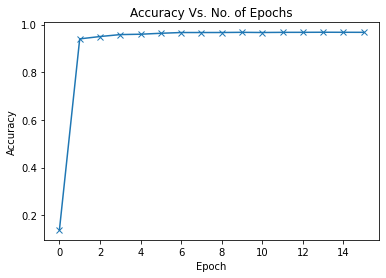

In [39]:
accuracies = [val_acc] + metrics1 + metrics2 + metrics3
plt.plot(accuracies,'-x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs. No. of Epochs')

In [40]:
# this will not go beoyend 96%